### Homework 2 - CNN CIFAR 10 
https://www.tensorflow.org/alpha/tutorials/images/intro_to_cnns

pip install tensorflow==2.0.0-alpha0 
or 
pip install tensorflow==2.0.0-alpha0-gpu
1. Loading Dataset
2. Baseline Model
3. Image Augmentation
4. Transfer Learning MobileNetV2

#### 1. Loading Dataset

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import random

In [36]:
(train_images, train_labels), (_, _) = datasets.cifar10.load_data()
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size= 0.2, random_state= random.randint(0, 100000))

In [37]:
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3))
validation_images = validation_images.reshape((validation_images.shape[0], 32, 32, 3))

In [38]:
# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [39]:
train_images.shape, validation_images.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [40]:
%pylab inline
import matplotlib.pyplot as plt
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Populating the interactive namespace from numpy and matplotlib


C:\Users\ken\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [41]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

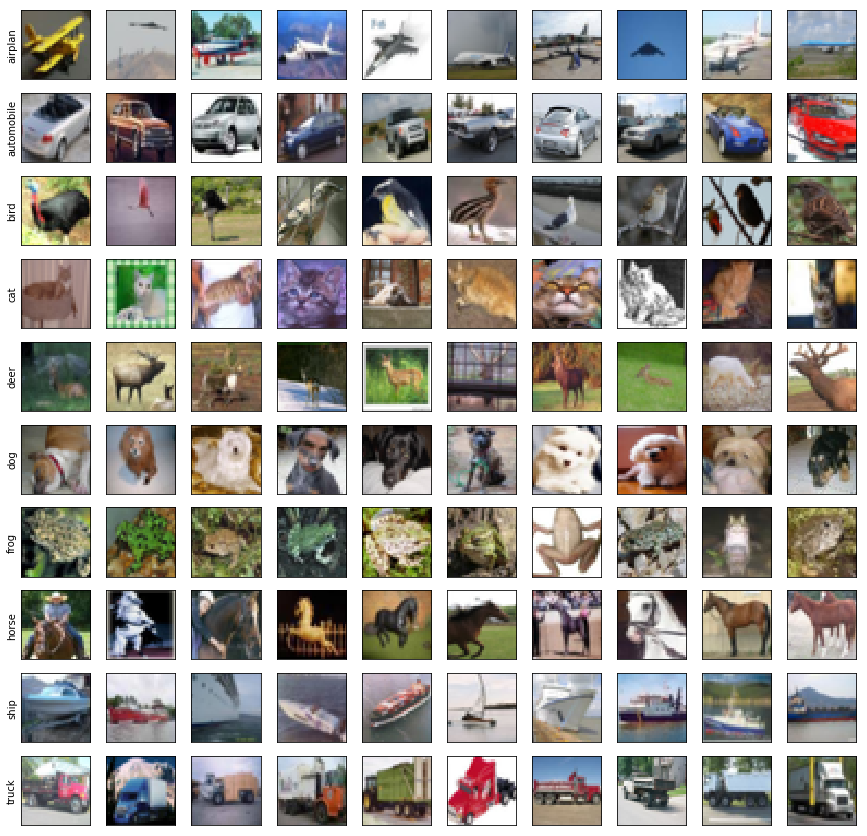

In [42]:
plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

### 2. Baseline Model

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from sklearn.model_selection import train_test_split
import random

In [54]:
(train_images, train_labels), (_, _) = datasets.cifar10.load_data()
#Validation
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size= 0.2, random_state= random.randint(0, 100000))
#Reshape
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3))
validation_images = validation_images.reshape((validation_images.shape[0], 32, 32, 3))
# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [55]:
def baselineModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    #Dense Layers and output
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [56]:
model = baselineModel()

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [60]:
callback = [callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-2,
        #5 epochs minimum
        patience = 5,
        verbose=1)]
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.load_weights('./checkpoints/my_checkpoint')
model.fit(train_images, train_labels, 
          validation_data=(validation_images, validation_labels), 
          epochs=100, 
          batch_size=50, 
          callbacks=callback)

model.save_weights("./checkpoints/my_checkpoint")

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 6s 160us/sample - loss: 1.6174 - accuracy: 0.4055 - val_loss: 1.3953 - val_accuracy: 0.5050
Epoch 2/100
40000/40000 [==============================] - 6s 151us/sample - loss: 1.2581 - accuracy: 0.5530 - val_loss: 1.1990 - val_accuracy: 0.5771
Epoch 3/100
40000/40000 [==============================] - 6s 151us/sample - loss: 1.1139 - accuracy: 0.6081 - val_loss: 1.1414 - val_accuracy: 0.5960
Epoch 4/100
40000/40000 [==============================] - 6s 153us/sample - loss: 1.0116 - accuracy: 0.6463 - val_loss: 1.0369 - val_accuracy: 0.6347
Epoch 5/100
40000/40000 [==============================] - 6s 153us/sample - loss: 0.9402 - accuracy: 0.6705 - val_loss: 0.9921 - val_accuracy: 0.6561
Epoch 6/100
40000/40000 [==============================] - 6s 152us/sample - loss: 0.8733 - accuracy: 0.6953 - val_loss: 0.9865 - val_accuracy: 0.6539
Epoch 7/100
40000/40000 [===================

Model stopped learning at 70% accuracy

### 3. Image Augmentation

https://www.reddit.com/r/MachineLearning/comments/axq6lu/p_albumentations_an_image_augmentation_library/

pip install -U albumentations

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from sklearn.model_selection import train_test_split
import random

In [2]:
(train_images, train_labels), (_, _) = datasets.cifar10.load_data()
#Validation
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size= 0.2, random_state= random.randint(0, 100000))
#Reshape
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3))
validation_images = validation_images.reshape((validation_images.shape[0], 32, 32, 3))
# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [3]:
def baselineModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    #Dense Layers and output
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [4]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [5]:
from albumentations import (
    HorizontalFlip, ShiftScaleRotate, RandomRotate90,
    Transpose, ShiftScaleRotate
)

In [6]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()

In [8]:
def augment(aug, image):
    image = aug(image=image)['image']
    return image

Example: https://github.com/albu/albumentations/blob/master/notebooks/example.ipynb

In [9]:
image = download_image('https://therunnersports.com/wp-content/uploads/2019/02/univ-of-central-florida-football-admirable-ucf-knights-of-univ-of-central-florida-football.jpg')

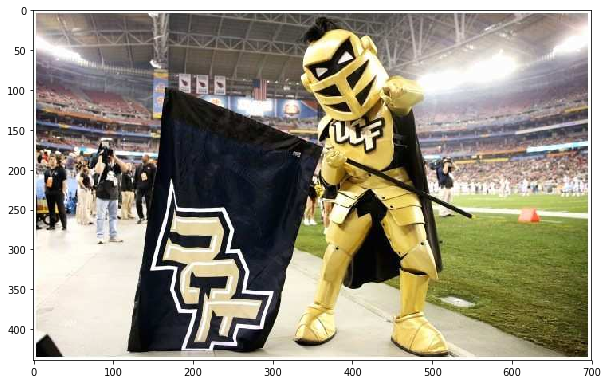

In [10]:
show_image(image)

Horizontal Flip

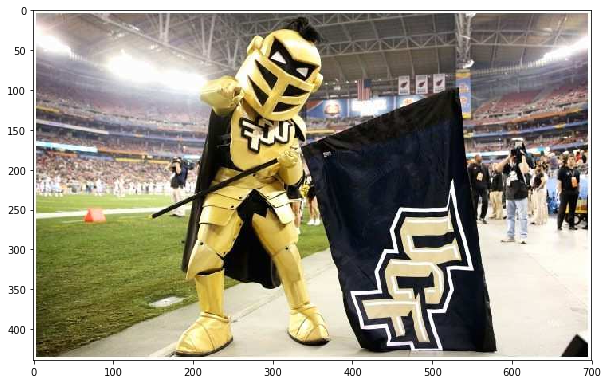

In [11]:
aug = HorizontalFlip(p=1)
show_image(augment(aug,image))

Rotate keep dimensions

0.5


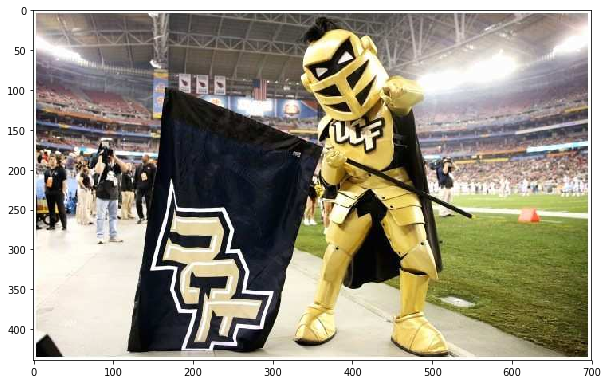

1.0


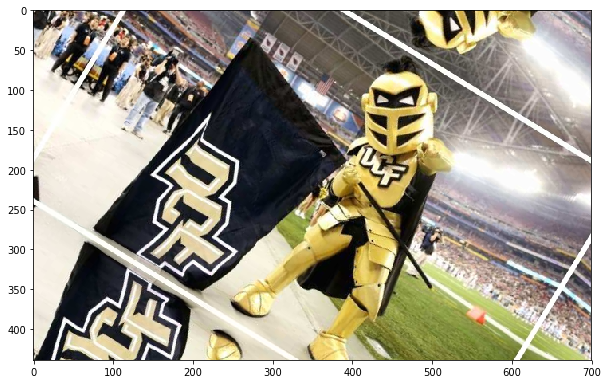

1.5


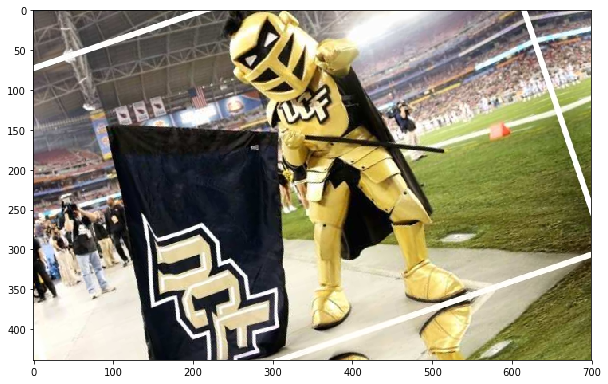

2.0


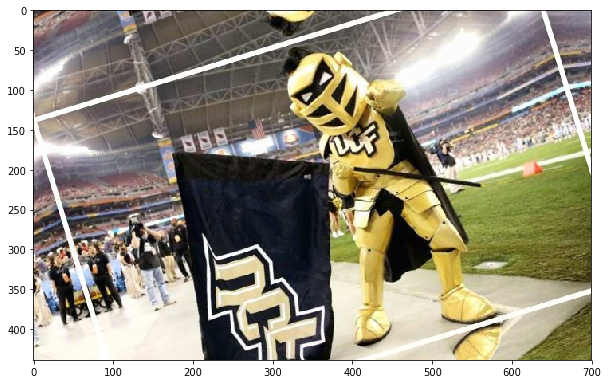

In [12]:
for i in range(1,5):
    aug = ShiftScaleRotate(p=i*.5)
    print(i*.5)
    show_image(augment(aug,image)) 

In [13]:
#Returns 4 images
def augment_rotate(image, i):
    aug = ShiftScaleRotate(p=i)  
    return aug(image=image)['image']

In [14]:
def preprocessDataset(images, labels):
    size = images.shape[0]
    rotations = [0,.5,1.0,1.5,2.0]
    augmented_images = np.array([augment_rotate(i, j) for i in images for j in rotations])
    augmented_labels = np.array([val for val in labels for _ in range(0, 5)])
    
    return augmented_images, augmented_labels

Lets augment our training data

In [15]:
%%time
train_images, train_labels = preprocessDataset(train_images, train_labels)
print("done")

done
Wall time: 47.6 s


In [16]:
model = baselineModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [17]:
callback = [callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-2,
        patience = 5,
        verbose=1)]
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.load_weights('./checkpoints/my_checkpoint')
model.fit(train_images, train_labels, 
          validation_data=(validation_images, validation_labels), 
          epochs=100, 
          batch_size=50, 
          callbacks=callback)

model.save_weights("./checkpoints/my_checkpoint")

Train on 200000 samples, validate on 10000 samples
Epoch 1/100
200000/200000 [==============================] - 30s 151us/sample - loss: 1.4152 - accuracy: 0.4921 - val_loss: 1.1168 - val_accuracy: 0.6055
Epoch 2/100
200000/200000 [==============================] - 28s 139us/sample - loss: 1.1069 - accuracy: 0.6090 - val_loss: 0.9912 - val_accuracy: 0.6547
Epoch 3/100
200000/200000 [==============================] - 28s 139us/sample - loss: 0.9963 - accuracy: 0.6490 - val_loss: 0.9309 - val_accuracy: 0.6741
Epoch 4/100
200000/200000 [==============================] - 28s 139us/sample - loss: 0.9213 - accuracy: 0.6772 - val_loss: 0.8863 - val_accuracy: 0.6952
Epoch 5/100
200000/200000 [==============================] - 28s 142us/sample - loss: 0.8689 - accuracy: 0.6943 - val_loss: 0.8919 - val_accuracy: 0.6954
Epoch 6/100
200000/200000 [==============================] - 28s 142us/sample - loss: 0.8240 - accuracy: 0.7107 - val_loss: 0.8670 - val_accuracy: 0.7085
Epoch 7/100
200000/200000

Image augmentation did 1.6% better.

### 4. Transfer Learning
https://www.tensorflow.org/alpha/tutorials/images/transfer_learning

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from sklearn.model_selection import train_test_split
import random

In [2]:
(train_images, train_labels), (_, _) = datasets.cifar10.load_data()
#Validation
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size= 0.2, random_state= random.randint(0, 100000))
#Reshape
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3))
validation_images = validation_images.reshape((validation_images.shape[0], 32, 32, 3))
# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [3]:
import tensorflow as tf
keras = tf.keras

Format the Data - Needed because it needs to match base model training

using albumentation library to resize https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.Resize

In [4]:
from albumentations import (
    Resize
)

In [5]:
def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()

In [6]:
#Returns 4 images
def augment_resize(image, height, width):
    aug = Resize(height=height, width=width)  
    return aug(image=image)['image']

In [7]:
show_image(augment_resize(train_images[0], 75, 75))

NameError: name 'plt' is not defined

In [8]:
def preprocessDatasetResize(images, labels, height, width):
    augmented_images = np.array([augment_resize(i, height, width) for i in images])
    #note label is unchanged
    return np.float32(augmented_images), labels

We also need to resize the validation data so we can pass it into the model

In [9]:
%%time
IMG_SIZE = 96 # All images will be resized to 96x96
train_images, train_labels = preprocessDatasetResize(train_images, train_labels, IMG_SIZE, IMG_SIZE)
validation_images, validation_labels = preprocessDatasetResize(validation_images, validation_labels, IMG_SIZE, IMG_SIZE)
print("Done")

Done
Wall time: 27 s


Feature Extraction Transfer Learning

Mobile Net v2 https://arxiv.org/pdf/1801.04381.pdf

In [27]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [28]:
#output of the pre trained model without the top layer
base_model(train_images[:100]).shape

TensorShape([100, 3, 3, 1280])

Freeze the base model to prevent training on pre trained weights

In [29]:
#base_model.trainable = False

for layer in base_model.layers[:-12]:
       layer.trainable = False

In [30]:
base_model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, 48, 48, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [31]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [32]:
global_average_layer(base_model(train_images[:100])).shape

TensorShape([100, 1280])

In [33]:
prediction_layer =  models.Sequential()
prediction_layer.add(layers.Dense(10, activation='softmax'))

Combine layers

In [34]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 10)                12810     
Total params: 2,270,794
Trainable params: 898,890
Non-trainable params: 1,371,904
_________________________________________________________________


In [37]:
callback = [callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-2,
        patience = 5,
        verbose=1)]

#model.load_weights('./checkpoints/my_checkpoint')
model.fit(train_images, train_labels, 
          validation_data=(validation_images, validation_labels), 
          epochs=100, 
          batch_size=50, 
          callbacks=callback)

model.save_weights("./checkpoints/my_checkpoint")

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 28s 709us/sample - loss: 0.5368 - accuracy: 0.8237 - val_loss: 1.8632 - val_accuracy: 0.6562
Epoch 2/100
40000/40000 [==============================] - 25s 623us/sample - loss: 0.3497 - accuracy: 0.8785 - val_loss: 1.2710 - val_accuracy: 0.7310
Epoch 3/100
40000/40000 [==============================] - 25s 625us/sample - loss: 0.2822 - accuracy: 0.8993 - val_loss: 0.9335 - val_accuracy: 0.8019
Epoch 4/100
40000/40000 [==============================] - 25s 626us/sample - loss: 0.2453 - accuracy: 0.9135 - val_loss: 0.6628 - val_accuracy: 0.8500
Epoch 5/100
40000/40000 [==============================] - 25s 625us/sample - loss: 0.1972 - accuracy: 0.9297 - val_loss: 0.5689 - val_accuracy: 0.8732
Epoch 6/100
40000/40000 [==============================] - 25s 624us/sample - loss: 0.1748 - accuracy: 0.9388 - val_loss: 0.5811 - val_accuracy: 0.8711
Epoch 7/100
40000/40000 [=============

### 5. Combine

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from sklearn.model_selection import train_test_split
import random

We have the training and test data saved in a local folder

In [2]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip, ShiftScaleRotate, RandomRotate90,
    Transpose, ShiftScaleRotate
)

In [3]:
def augment_rotate(image, i):
    aug = ShiftScaleRotate(p=i)  
    return aug(image=image)['image']

def preprocessDataset(images, labels):
    size = images.shape[0]
    rotations = [0,.5,1.0,1.5,2.0]
    augmented_images = np.array([augment_rotate(i, j) for i in images for j in rotations])
    augmented_labels = np.array([val for val in labels for _ in range(0, 5)])
    
    return augmented_images, augmented_labels

In [4]:
keras = tf.keras

In [5]:
from PIL import Image

from albumentations import (
    Resize
)

def augment_resize(image, height, width):
    aug = Resize(height=height, width=width)  
    return aug(image=image)['image']

def preprocessDatasetResize(images, labels, height, width, location):
    n_images = len(images)
    for i in range(0, n_images):
        im = np.array(augment_resize(images[i], height, width))
        im = Image.fromarray(im)
        im.save(r"{}\{}.jpeg".format(location, i))
        

Save the augmented training set and non augmented test set locally.

https://keras.io/utils/ Sequence images

In [6]:
from skimage.io import imread
from skimage.transform import resize
#from tensorflow.keras import utils.Sequence()
import numpy as np

# Here, `x_set` is list of path to the images
# and `y_set` are the associated classes.

class CIFAR10Sequence(tf.keras.utils.Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return np.array([
                   imread(file_name)
               for file_name in batch_x])/255, np.array(batch_y)

In [9]:
import os
location =  r"E:\Data\CIFAR10\Train"
#Need to sort files so it matches the labels
files = sorted(os.listdir(location), key=lambda x : int(x[:-5]))
train = [ r"{}\{}".format(location,i) for i in files]
location = r"E:\Data\CIFAR10\Test"
files = sorted(os.listdir(location), key=lambda x : int(x[:-5]))
test = [ r"{}\{}".format(location,i) for i in files]

location = r"E:\Data\CIFAR10"
file = "Train.csv"
train_label = pd.read_csv(r"{}/{}".format(location, file),index_col=0).values
file = "Test.csv"
test_label = pd.read_csv(r"{}/{}".format(location, file),index_col=0).values

train, validation, train_label, validation_label = train_test_split(train, train_label, test_size= 0.2, random_state= random.randint(0, 100000))

train_seq = CIFAR10Sequence(train, train_label, 50)
validation_seq = CIFAR10Sequence(validation, validation_label, 50)
test_seq = CIFAR10Sequence(test, test_label, 50)

In [10]:
IMG_SIZE = 96
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

for layer in base_model.layers[:-12]:
    layer.trainable = False
        
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer =  models.Sequential()
prediction_layer.add(layers.Dense(10, activation='softmax'))

model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
sequential (Sequential)      (None, 10)                12810     
Total params: 2,270,794
Trainable params: 898,890
Non-trainable params: 1,371,904
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = [callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-2,
        patience = 5,
        verbose=1)]

#model.load_weights('./checkpoints/my_checkpoint')

model.fit_generator(train_seq, epochs=30, validation_data=validation_seq, shuffle=True, callbacks=callback)

model.save_weights("./checkpoints/my_checkpoint")

Epoch 1/30
4000/4000 [==============================] - 211s 53ms/step - loss: 0.7197 - accuracy: 0.7518 - val_loss: 0.7062 - val_accuracy: 0.7770
Epoch 2/30
4000/4000 [==============================] - 205s 51ms/step - loss: 0.5305 - accuracy: 0.8140 - val_loss: 0.5554 - val_accuracy: 0.8226
Epoch 3/30
4000/4000 [==============================] - 202s 50ms/step - loss: 0.4256 - accuracy: 0.8500 - val_loss: 0.4937 - val_accuracy: 0.8354
Epoch 4/30
4000/4000 [==============================] - 202s 50ms/step - loss: 0.3403 - accuracy: 0.8784 - val_loss: 0.5237 - val_accuracy: 0.8361
Epoch 5/30
4000/4000 [==============================] - 186s 47ms/step - loss: 0.2725 - accuracy: 0.9029 - val_loss: 0.5248 - val_accuracy: 0.8404
Epoch 6/30
4000/4000 [==============================] - 197s 49ms/step - loss: 0.2188 - accuracy: 0.9221 - val_loss: 0.5601 - val_accuracy: 0.8409
Epoch 7/30
4000/4000 [==============================] - 199s 50ms/step - loss: 0.1772 - accuracy: 0.9364 - val_loss: 0

In [12]:
model.evaluate_generator(test_seq)

[0.7762116087973118, 0.8461]